#GAN Demo on MNIST Data

## Get the device information

In [ ]:
import torch
torch.cuda.get_device_name(device=None)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {torch.cuda.get_device_name() if torch.cuda.is_available() else 'CPU'}")

## Load necessary libraries

In [ ]:
import torch
import torch.optim as opt
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt

## Set up data loader for MNIST data

Note that only class labels 2,4,6 are preserved. Other samples having labels different from 2,4,6 are discarded.

In [ ]:
mb_size = 64   #Mini-batch size

def get_indices(dataset):
    indices =  []
    for i in range(len(dataset.targets)):
        if dataset.targets[i] == 2 or dataset.targets[i] == 4 or dataset.targets[i] == 6:
            indices.append(i)   #indices of data with labels 2, 4 or 6
    return indices

trainData = torchvision.datasets.MNIST('./data', download=True, transform=transforms.ToTensor(), train=True)

idx = get_indices(trainData)
print('Num Train Samples with labels 2,4,6:', len(idx))

trainLoader = torch.utils.data.DataLoader(trainData,batch_size=mb_size,
                                          sampler = torch.utils.data.sampler.SubsetRandomSampler(idx))

Num Train Samples with labels 2,4,6: 17718


In [ ]:
#Note: No. of training data samples = 17718

## Check a few data samples

In [ ]:
#Set up an iterator for data loader and get the next batch
dataIter = iter(trainLoader)
imgs, labels = next(dataIter)


In [ ]:
#Print
imgs.shape  #shape of the tensor data obtained from the train loader

torch.Size([64, 1, 28, 28])

In [ ]:
def imshow(imgs):
    imgs = torchvision.utils.make_grid(imgs)
    imgs = imgs.cpu()
    npimgs = imgs.numpy()
    plt.figure(figsize=(8,8))
    plt.imshow(np.transpose(npimgs, (1,2,0)), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.show()

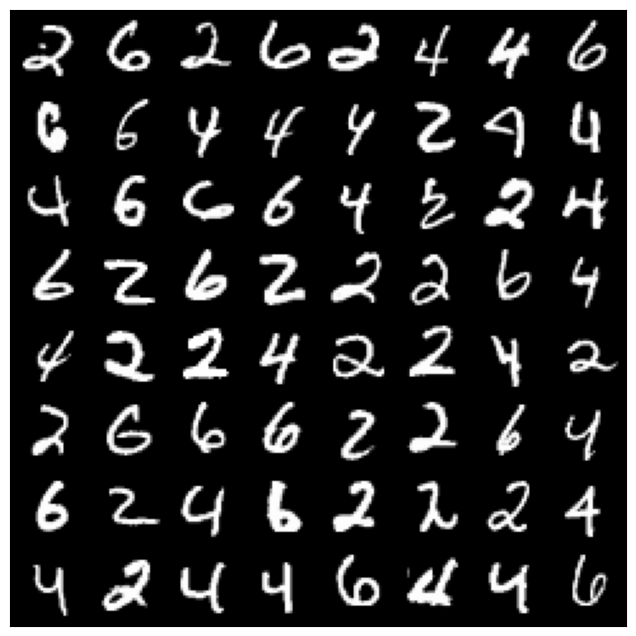

In [ ]:
imshow(imgs)

## GAN Architecture with Discriminator and Generator

![Generative Adversarial Network](https://www.kdnuggets.com/wp-content/uploads/generative-adversarial-network.png)

## Set up latent dimension, hidden layer dimension and output dimension

In [ ]:
Z_dim = 100  #size of the generated data
H_dim = 128  #no. of hidden neurons
X_dim = imgs.view(imgs.size(0), -1).size(1) #output neurons to generate an image

print('latent dimension:',Z_dim, ', Hidden layer dimension:',H_dim, ', Input/Output dimension:',X_dim)

latent dimension: 100 , Hidden layer dimension: 128 , Input/Output dimension: 784


## Create Generator

In [ ]:
#neural network for generative network
class Gen(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(Z_dim, H_dim),
            nn.ReLU(),
            nn.Linear(H_dim, X_dim),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.model(input)

In [ ]:
def weights_init(m):
    if isinstance(m, nn.Linear):
        nn.init.normal_(m.weight, 0.0, 0.02)  # Initialize the weights from a normal distribution
        if m.bias is not None:
            nn.init.constant_(m.bias, 0)  # Initialize biases to 0

In [ ]:
# G = Gen()
G = Gen().to(device)
G.apply(weights_init)  # Apply weight initialization
print(G)

Gen(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=784, bias=True)
    (3): Sigmoid()
  )
)


## Create Discriminator

In [ ]:
#neural network for discriminative model
class Dis(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(X_dim, H_dim),
            nn.ReLU(),
            nn.Linear(H_dim, 1),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.model(input)

In [ ]:
# Instantiate Discriminator
D = Dis().to(device)
D.apply(weights_init)  # Apply weight initialization
print(D)

Dis(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=1, bias=True)
    (3): Sigmoid()
  )
)


## Set up learning rate and optimizers

In [ ]:
lr = 1e-3
g_opt = opt.Adam(G.parameters(), lr=lr)
d_opt = opt.Adam(D.parameters(), lr=lr)

## Training module for the GAN architecture

Epoch 0/101, Generator Loss: 2.8227, Discriminator Loss: 0.6073


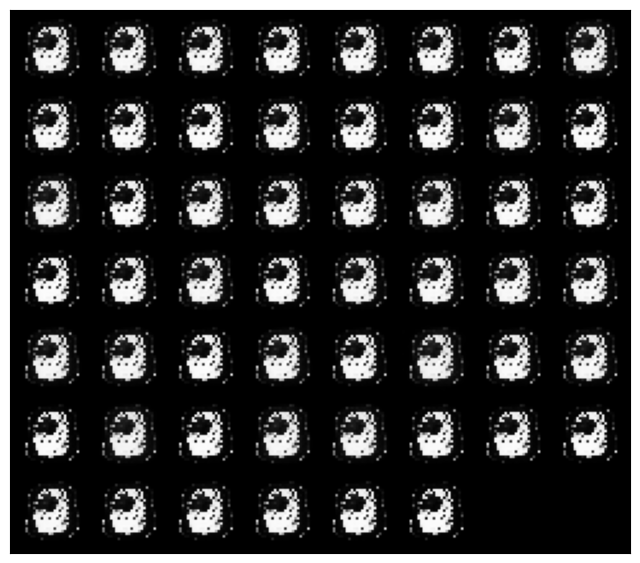

Epoch 1/101, Generator Loss: 3.3559, Discriminator Loss: 0.4642
Epoch 2/101, Generator Loss: 3.6034, Discriminator Loss: 0.4328
Epoch 3/101, Generator Loss: 3.3318, Discriminator Loss: 0.4534
Epoch 4/101, Generator Loss: 2.8263, Discriminator Loss: 0.5317
Epoch 5/101, Generator Loss: 2.2526, Discriminator Loss: 0.5995
Epoch 6/101, Generator Loss: 2.2587, Discriminator Loss: 0.6050
Epoch 7/101, Generator Loss: 2.4452, Discriminator Loss: 0.6123
Epoch 8/101, Generator Loss: 2.6738, Discriminator Loss: 0.5915
Epoch 9/101, Generator Loss: 2.6160, Discriminator Loss: 0.6384
Epoch 10/101, Generator Loss: 2.5438, Discriminator Loss: 0.6342


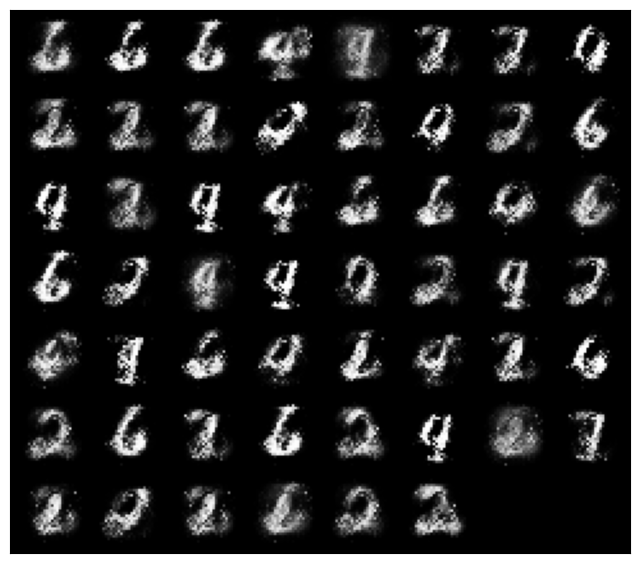

Epoch 11/101, Generator Loss: 2.5029, Discriminator Loss: 0.6818
Epoch 12/101, Generator Loss: 2.4956, Discriminator Loss: 0.7504
Epoch 13/101, Generator Loss: 2.3752, Discriminator Loss: 0.7292
Epoch 14/101, Generator Loss: 2.3004, Discriminator Loss: 0.8038
Epoch 15/101, Generator Loss: 2.3929, Discriminator Loss: 0.7806
Epoch 16/101, Generator Loss: 2.1566, Discriminator Loss: 0.8553
Epoch 17/101, Generator Loss: 2.0988, Discriminator Loss: 0.8531
Epoch 18/101, Generator Loss: 2.2279, Discriminator Loss: 0.8748
Epoch 19/101, Generator Loss: 2.0124, Discriminator Loss: 0.8424
Epoch 20/101, Generator Loss: 1.8403, Discriminator Loss: 0.9120


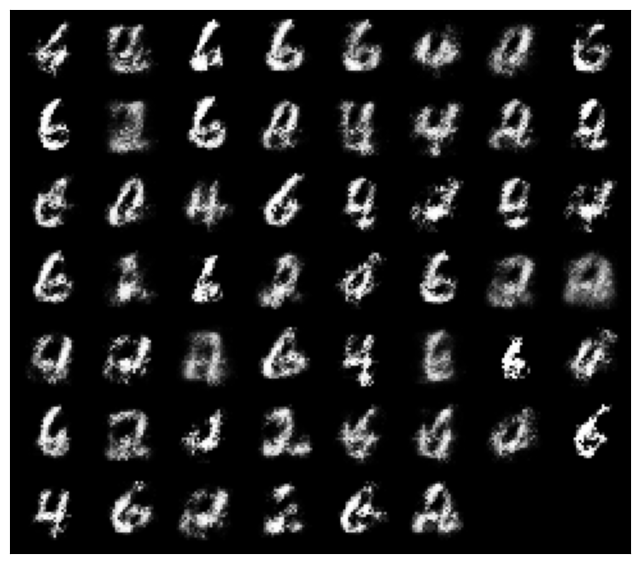

Epoch 21/101, Generator Loss: 1.8296, Discriminator Loss: 0.9380
Epoch 22/101, Generator Loss: 1.8764, Discriminator Loss: 0.9374
Epoch 23/101, Generator Loss: 1.8831, Discriminator Loss: 0.9768
Epoch 24/101, Generator Loss: 2.0489, Discriminator Loss: 0.9979
Epoch 25/101, Generator Loss: 1.8564, Discriminator Loss: 0.9660
Epoch 26/101, Generator Loss: 1.8277, Discriminator Loss: 1.0145
Epoch 27/101, Generator Loss: 1.8709, Discriminator Loss: 1.0759
Epoch 28/101, Generator Loss: 1.7107, Discriminator Loss: 1.0782
Epoch 29/101, Generator Loss: 1.5505, Discriminator Loss: 1.0779
Epoch 30/101, Generator Loss: 1.7385, Discriminator Loss: 1.0468


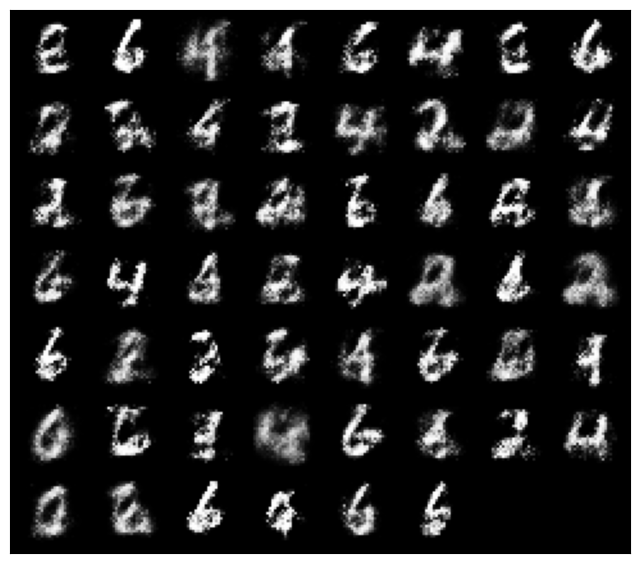

Epoch 31/101, Generator Loss: 1.6135, Discriminator Loss: 1.1360
Epoch 32/101, Generator Loss: 1.5192, Discriminator Loss: 1.1409
Epoch 33/101, Generator Loss: 1.5246, Discriminator Loss: 1.0787
Epoch 34/101, Generator Loss: 1.6231, Discriminator Loss: 1.0998
Epoch 35/101, Generator Loss: 1.4751, Discriminator Loss: 1.0918
Epoch 36/101, Generator Loss: 1.4319, Discriminator Loss: 1.1079
Epoch 37/101, Generator Loss: 1.3437, Discriminator Loss: 1.1057
Epoch 38/101, Generator Loss: 1.4643, Discriminator Loss: 1.0715
Epoch 39/101, Generator Loss: 1.4137, Discriminator Loss: 1.1066
Epoch 40/101, Generator Loss: 1.3595, Discriminator Loss: 1.1485


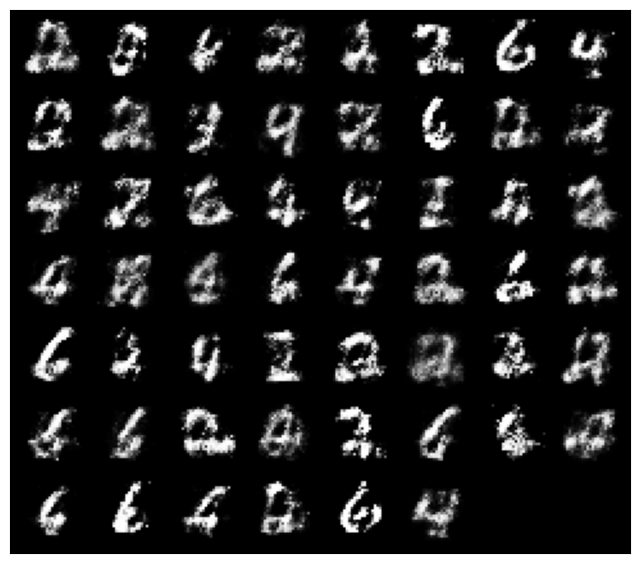

Epoch 41/101, Generator Loss: 1.3672, Discriminator Loss: 1.1538
Epoch 42/101, Generator Loss: 1.4230, Discriminator Loss: 1.1448
Epoch 43/101, Generator Loss: 1.4240, Discriminator Loss: 1.1484
Epoch 44/101, Generator Loss: 1.4413, Discriminator Loss: 1.1822
Epoch 45/101, Generator Loss: 1.4287, Discriminator Loss: 1.1486
Epoch 46/101, Generator Loss: 1.4069, Discriminator Loss: 1.1736
Epoch 47/101, Generator Loss: 1.3651, Discriminator Loss: 1.1409
Epoch 48/101, Generator Loss: 1.2677, Discriminator Loss: 1.2187
Epoch 49/101, Generator Loss: 1.3126, Discriminator Loss: 1.1710
Epoch 50/101, Generator Loss: 1.2715, Discriminator Loss: 1.1682


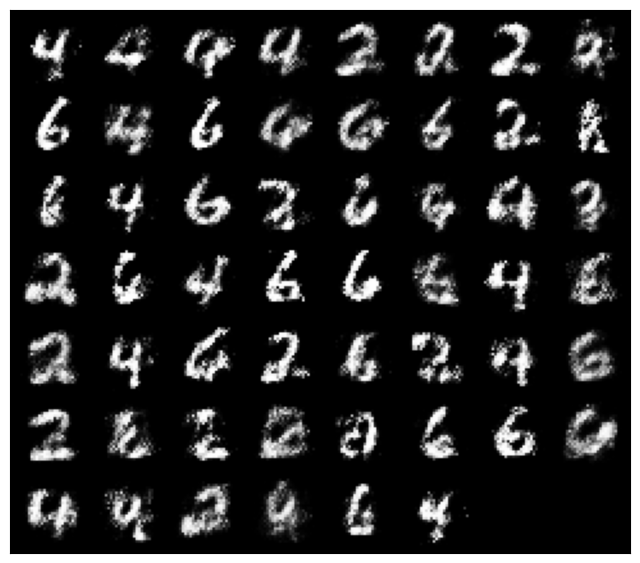

Epoch 51/101, Generator Loss: 1.2722, Discriminator Loss: 1.1599
Epoch 52/101, Generator Loss: 1.3190, Discriminator Loss: 1.1466
Epoch 53/101, Generator Loss: 1.2782, Discriminator Loss: 1.1639
Epoch 54/101, Generator Loss: 1.2741, Discriminator Loss: 1.1703
Epoch 55/101, Generator Loss: 1.2667, Discriminator Loss: 1.1655
Epoch 56/101, Generator Loss: 1.2583, Discriminator Loss: 1.1881
Epoch 57/101, Generator Loss: 1.3236, Discriminator Loss: 1.1569
Epoch 58/101, Generator Loss: 1.3489, Discriminator Loss: 1.1333
Epoch 59/101, Generator Loss: 1.2490, Discriminator Loss: 1.1906
Epoch 60/101, Generator Loss: 1.2937, Discriminator Loss: 1.1659


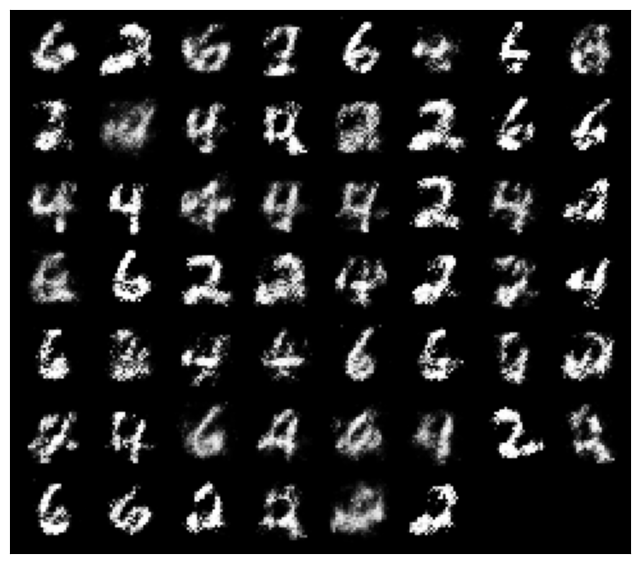

Epoch 61/101, Generator Loss: 1.2885, Discriminator Loss: 1.1587
Epoch 62/101, Generator Loss: 1.3730, Discriminator Loss: 1.1296
Epoch 63/101, Generator Loss: 1.2564, Discriminator Loss: 1.1436
Epoch 64/101, Generator Loss: 1.2494, Discriminator Loss: 1.1756
Epoch 65/101, Generator Loss: 1.2281, Discriminator Loss: 1.1708
Epoch 66/101, Generator Loss: 1.2462, Discriminator Loss: 1.1753
Epoch 67/101, Generator Loss: 1.2619, Discriminator Loss: 1.1711
Epoch 68/101, Generator Loss: 1.2786, Discriminator Loss: 1.1752
Epoch 69/101, Generator Loss: 1.3217, Discriminator Loss: 1.1477
Epoch 70/101, Generator Loss: 1.2609, Discriminator Loss: 1.1720


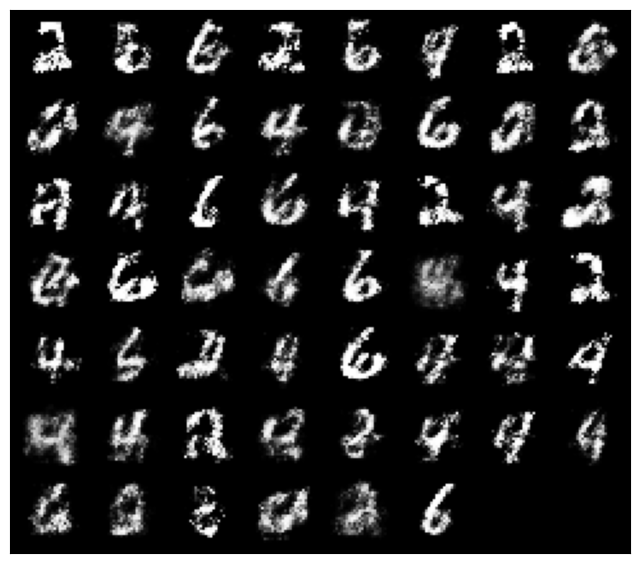

Epoch 71/101, Generator Loss: 1.2171, Discriminator Loss: 1.2014
Epoch 72/101, Generator Loss: 1.2233, Discriminator Loss: 1.2027
Epoch 73/101, Generator Loss: 1.2497, Discriminator Loss: 1.1882
Epoch 74/101, Generator Loss: 1.1768, Discriminator Loss: 1.2149
Epoch 75/101, Generator Loss: 1.2292, Discriminator Loss: 1.1881
Epoch 76/101, Generator Loss: 1.2631, Discriminator Loss: 1.1753
Epoch 77/101, Generator Loss: 1.2421, Discriminator Loss: 1.1730
Epoch 78/101, Generator Loss: 1.2296, Discriminator Loss: 1.1689
Epoch 79/101, Generator Loss: 1.2319, Discriminator Loss: 1.1509
Epoch 80/101, Generator Loss: 1.2680, Discriminator Loss: 1.1344


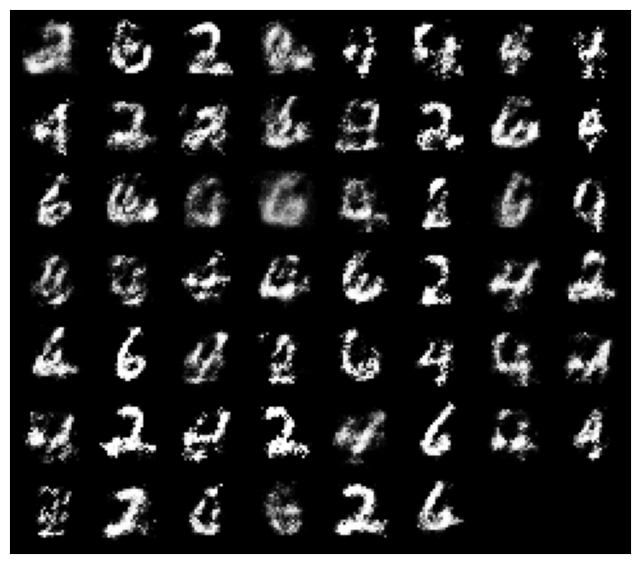

Epoch 81/101, Generator Loss: 1.2261, Discriminator Loss: 1.1466
Epoch 82/101, Generator Loss: 1.2792, Discriminator Loss: 1.1370
Epoch 83/101, Generator Loss: 1.2362, Discriminator Loss: 1.1457
Epoch 84/101, Generator Loss: 1.2465, Discriminator Loss: 1.1790
Epoch 85/101, Generator Loss: 1.2232, Discriminator Loss: 1.1726
Epoch 86/101, Generator Loss: 1.2084, Discriminator Loss: 1.1988
Epoch 87/101, Generator Loss: 1.1691, Discriminator Loss: 1.1886
Epoch 88/101, Generator Loss: 1.1922, Discriminator Loss: 1.1897
Epoch 89/101, Generator Loss: 1.1842, Discriminator Loss: 1.1948
Epoch 90/101, Generator Loss: 1.1860, Discriminator Loss: 1.1964


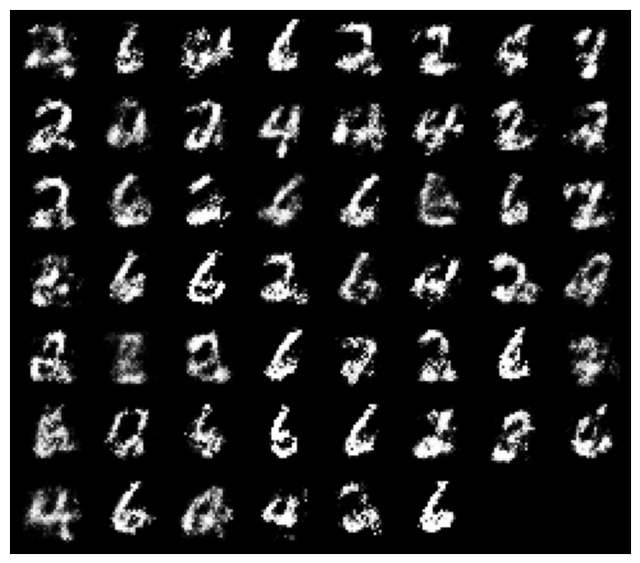

Epoch 91/101, Generator Loss: 1.1808, Discriminator Loss: 1.1839
Epoch 92/101, Generator Loss: 1.1501, Discriminator Loss: 1.1828
Epoch 93/101, Generator Loss: 1.1832, Discriminator Loss: 1.1957
Epoch 94/101, Generator Loss: 1.1521, Discriminator Loss: 1.2178
Epoch 95/101, Generator Loss: 1.1645, Discriminator Loss: 1.1787
Epoch 96/101, Generator Loss: 1.1350, Discriminator Loss: 1.1883
Epoch 97/101, Generator Loss: 1.1322, Discriminator Loss: 1.2014
Epoch 98/101, Generator Loss: 1.1324, Discriminator Loss: 1.1960
Epoch 99/101, Generator Loss: 1.1429, Discriminator Loss: 1.2109
Epoch 100/101, Generator Loss: 1.1296, Discriminator Loss: 1.2102


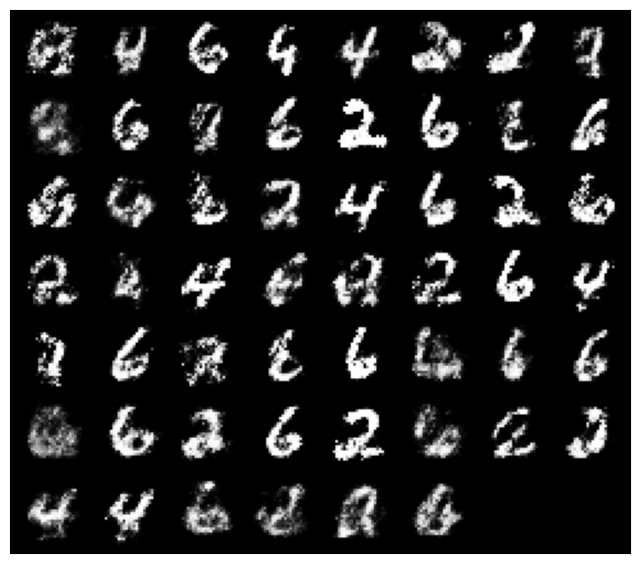

In [ ]:
num_epochs = 101
G_losses = []
D_losses = []

for epoch in range(num_epochs):
    G_loss_run = 0.0
    D_loss_run = 0.0

    for i, data in enumerate(trainLoader):
        X, _ = data
        X = X.view(X.size(0), -1).to(device)  # Flatten the images
        mb_size = X.size(0)

        # Labels for real and fake images
        one_labels = torch.full((mb_size, 1), 0.9).to(device)  # Real labels (label smoothing)
        zero_labels = torch.zeros(mb_size, 1).to(device)  # Fake labels

        # 1. Train Discriminator
        z = torch.randn(mb_size, Z_dim).to(device)
        D_real = D(X)  # Discriminator on real images
        D_fake = D(G(z))  # Discriminator on fake images

        D_real_loss = F.binary_cross_entropy(D_real, one_labels)
        D_fake_loss = F.binary_cross_entropy(D_fake, zero_labels)
        D_loss = D_real_loss + D_fake_loss

        d_opt.zero_grad()
        D_loss.backward()
        d_opt.step()

        # 2. Train Generator
        z = torch.randn(mb_size, Z_dim).to(device)
        D_fake = D(G(z))  # Discriminator on fake images
        G_loss = F.binary_cross_entropy(D_fake, one_labels)  # Flip labels

        g_opt.zero_grad()
        G_loss.backward()
        g_opt.step()

        G_loss_run += G_loss.item()
        D_loss_run += D_loss.item()

    # Print losses for each epoch
    print(f'Epoch {epoch}/{num_epochs}, Generator Loss: {G_loss_run/(i+1):.4f}, Discriminator Loss: {D_loss_run/(i+1):.4f}')
    G_losses.append(G_loss_run / (i+1))
    D_losses.append(D_loss_run / (i+1))

    # Showcase generated images every 10 epochs
    if epoch % 10 == 0:
        with torch.no_grad():
            samples = G(z).detach().cpu().view(-1, 1, 28, 28)
            imshow(samples)

In [ ]:
torch.save(G.state_dict(), 'generator_mnist.pth')

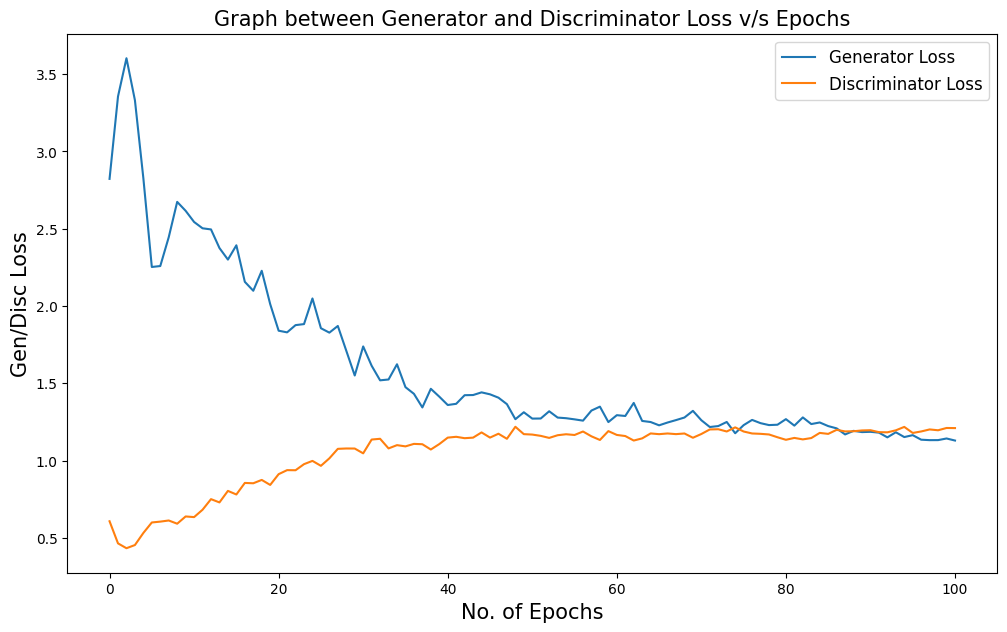

In [ ]:
#Plot losses
x_range = np.arange(0,num_epochs)
plt.figure(figsize =(12,7))
plt.plot(x_range,G_losses,label = "Generator Loss")
plt.plot(x_range,D_losses,label = "Discriminator Loss")
plt.ylabel("Gen/Disc Loss",fontsize = 15)
plt.xlabel("No. of Epochs",fontsize = 15)
plt.legend(fontsize = 12,loc = "best")
plt.title("Graph between Generator and Discriminator Loss v/s Epochs",fontsize = 15)
plt.show()

## Display generated images for an arbitrary noise

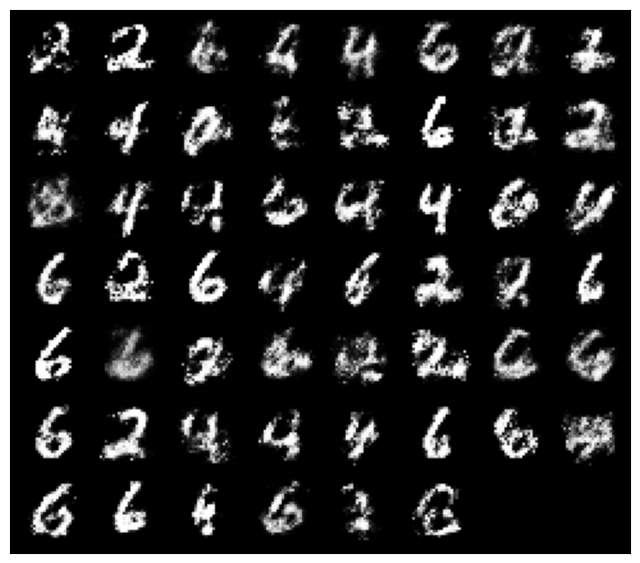

In [ ]:
#Showcase generated images for an arbitrary noise input
z = torch.randn(mb_size, Z_dim)
if torch.cuda.is_available():
  z = z.cuda()
with torch.no_grad():
    samples = G(z).detach()
    samples = samples.view(samples.size(0), 1, 28, 28)
    imshow(samples)

In [ ]:
def compare_images(real_images, generated_images, real_preds, fake_preds):
    """Visualize real and generated images with their discriminator predictions."""
    fig, axs = plt.subplots(2, 8, figsize=(20, 5))

    # Show real images
    for i in range(8):
        axs[0, i].imshow(real_images[i].cpu().numpy().squeeze(), cmap='gray')
        axs[0, i].set_title(f'Real: {real_preds[i].item():.2f}')  # Convert to Python scalar
        axs[0, i].axis('off')

    # Show generated images
    for i in range(8):
        axs[1, i].imshow(generated_images[i].cpu().numpy().squeeze(), cmap='gray')
        axs[1, i].set_title(f'Fake: {fake_preds[i].item():.2f}')  # Convert to Python scalar
        axs[1, i].axis('off')

    plt.tight_layout()
    plt.show()


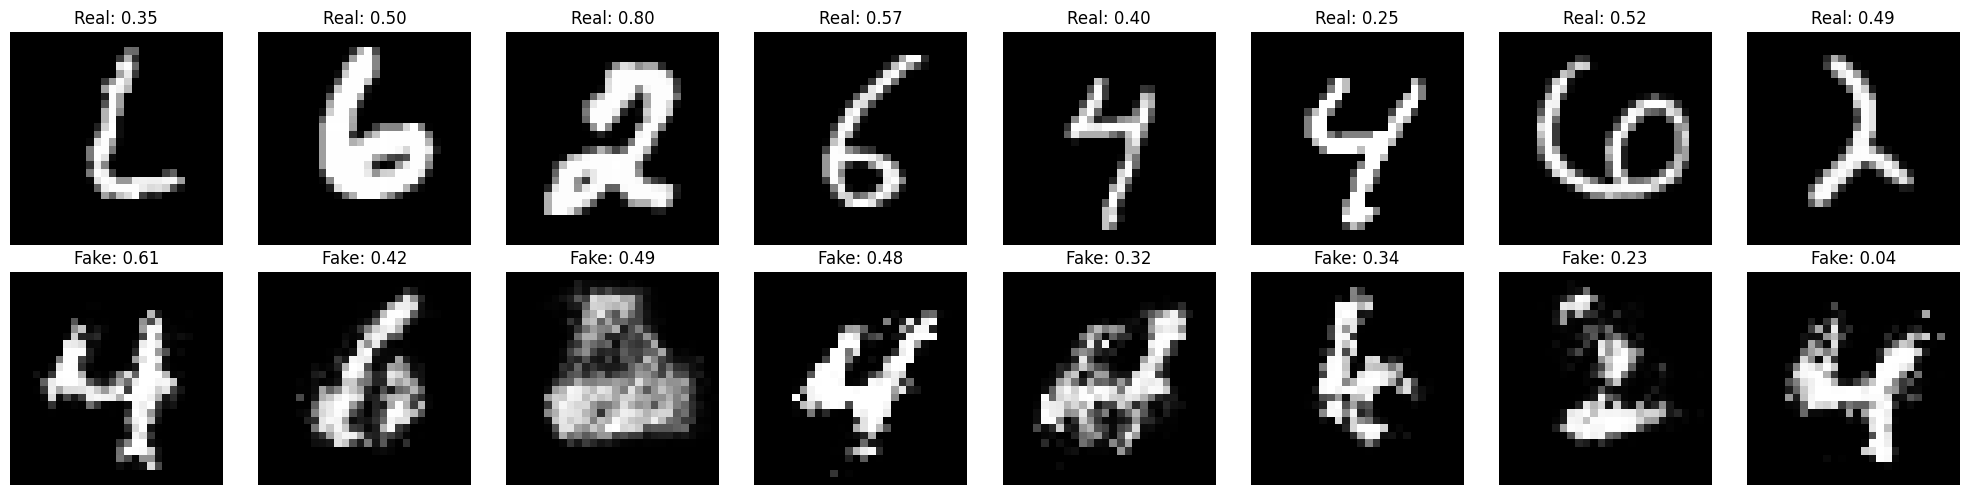

In [ ]:
with torch.no_grad():

    real_images, _ = next(dataIter)
    real_images = real_images.view(real_images.size(0), -1).to(device)  # Flatten the images
    real_preds = D(real_images).cpu()  # Discriminator predictions on real images

    z = torch.randn(64, Z_dim).to(device)
    generated_images = G(z).detach().cpu().view(-1, 1, 28, 28)

    # Get predictions from the discriminator on generated images
    fake_preds = D(generated_images.view(64, -1).to(device)).cpu()  # Flatten generated images for D

    # Compare real and generated images
    compare_images(real_images.view(-1, 1, 28, 28), generated_images, real_preds, fake_preds)